# <font color='Green'> Image Classification with CNN for CIFAR_10 Data</font>

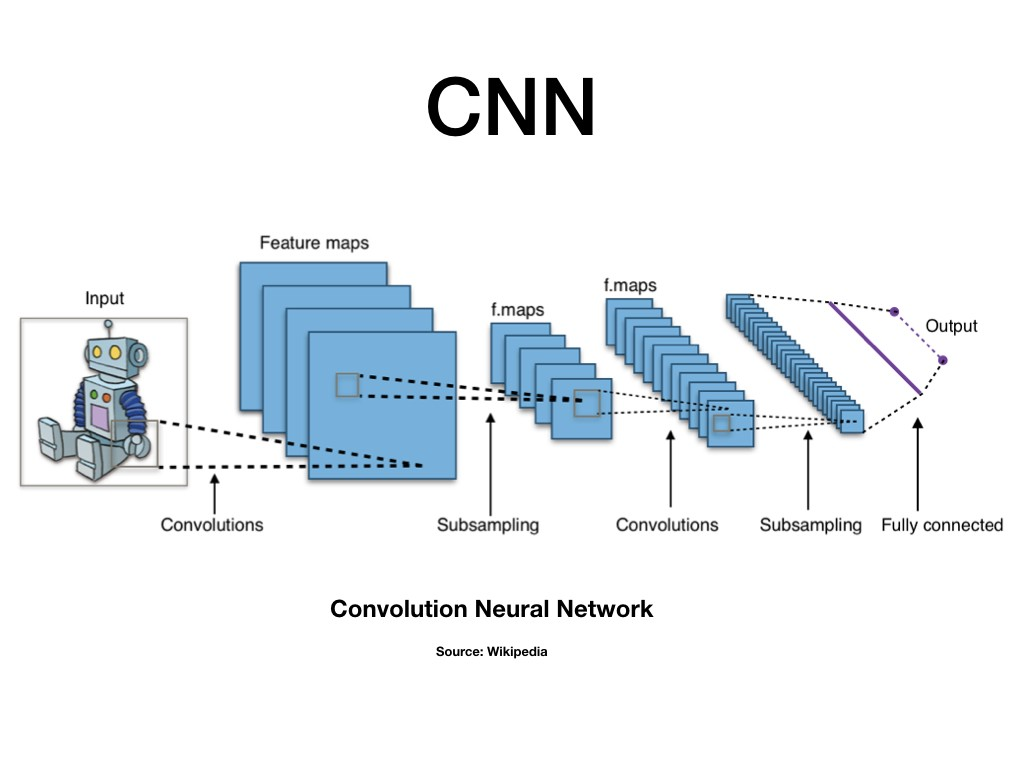

# IMPORT LIBRARY

In [51]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.image import imread
import warnings
warnings.filterwarnings('ignore')

# LOAD DATA  AND DATA VISUALIZATİON

In [2]:
from tensorflow.keras.datasets import fashion_mnist #fashion mnist dataset

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal', 'Shirt','Sneaker','Bag','Ankle boot']

Text(0.5, 0, 'T-shirt/top')

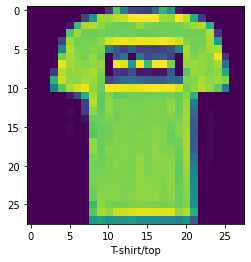

In [6]:
plt.imshow(X_train[1])
plt.xlabel(class_names[y_train[1]])

Text(0.5, 0, 'T-shirt/top')

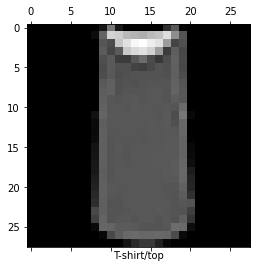

In [7]:
plt.matshow(X_train[2],cmap='gray')
plt.xlabel(class_names[y_train[2]])

Text(0.5, 0, 'Dress')

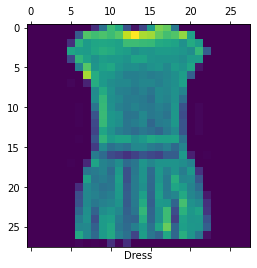

In [8]:
plt.matshow(X_train[3])
plt.xlabel(class_names[y_train[3]])

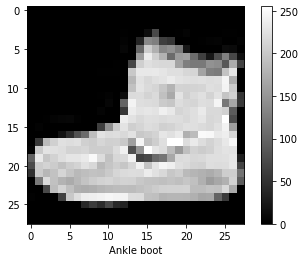

In [9]:
plt.figure()
plt.imshow(X_train[0],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[y_train[0]])
plt.show()

Text(0.5, 0, 'Sneaker')

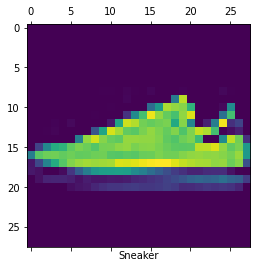

In [10]:
plt.matshow(X_train[6])
plt.xlabel(class_names[y_train[6]])

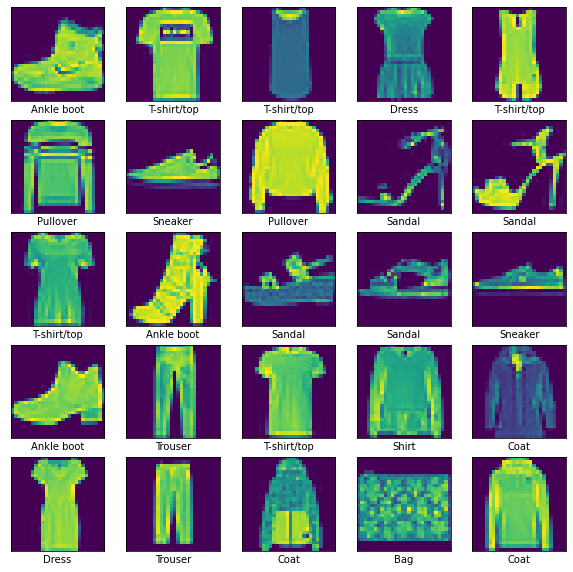

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

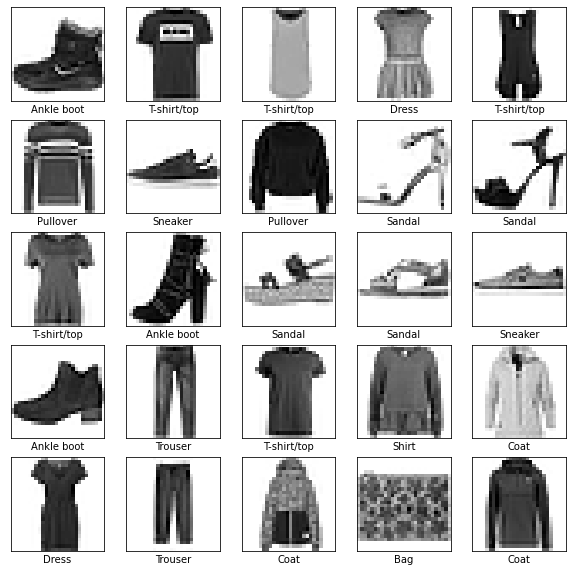

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

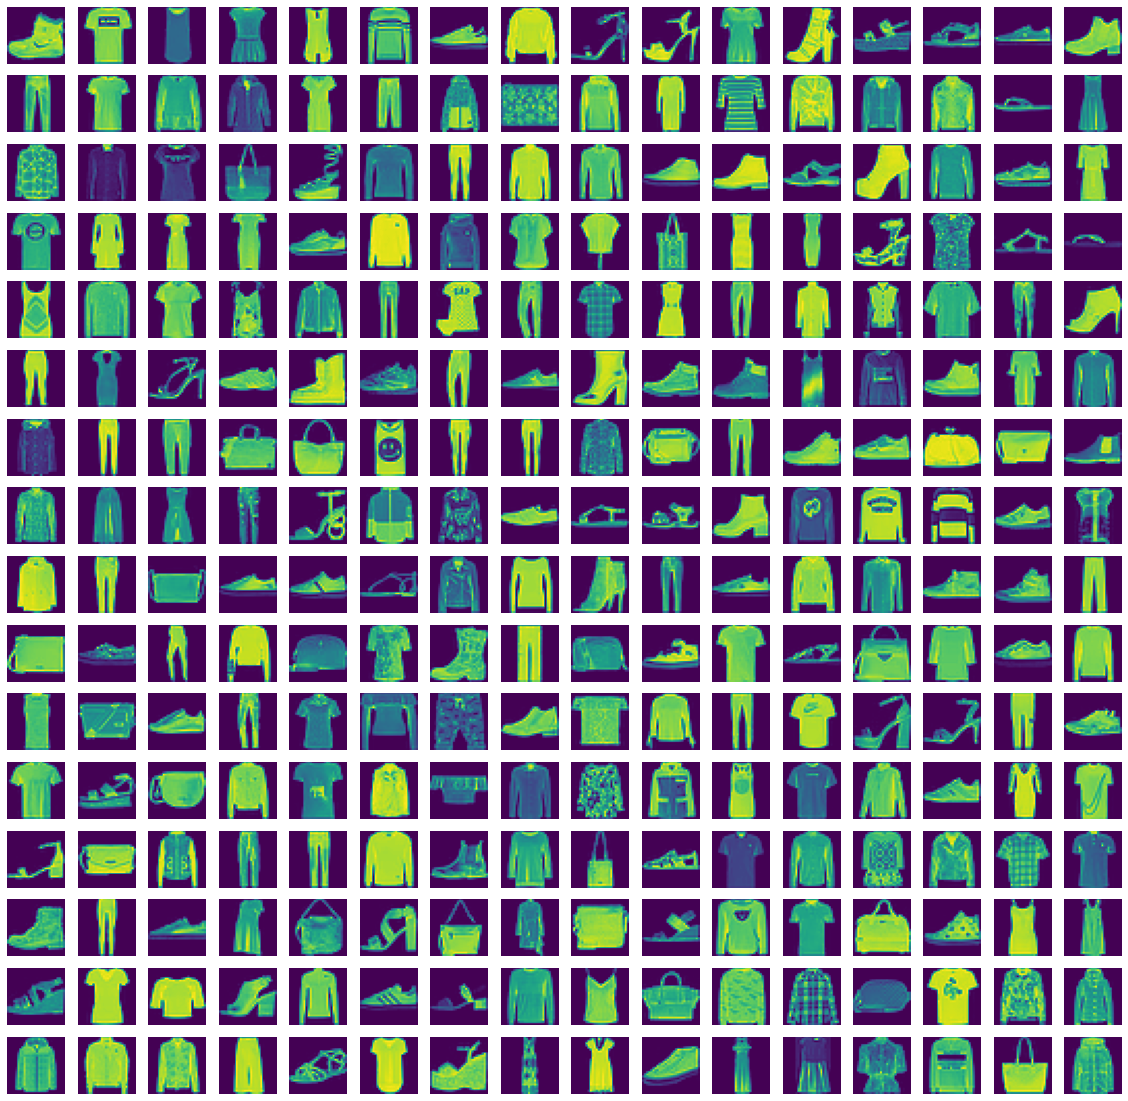

In [13]:
plt.figure(figsize= (20,20))
for i in range(256):
    plt.subplot(16,16,i+1)
    plt.axis('off')
    plt.imshow(X_train[i])

# Standartization

In [14]:
X_train.min()

0

In [15]:
X_train.max()

255

In [16]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [17]:
X_train.min()


0.0

In [18]:
X_train.max()

1.0

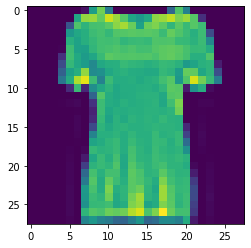

In [19]:
plt.imshow(X_train[10])

In [20]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1)# reshape the X into 4 dimension
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [21]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [22]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
Y_train = to_categorical(y_train, 10) # convert the y_train and y_test values to be one-hot encoded for categorical analysis.
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

# Model Building

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [26]:
#Define the model architecture
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu', strides=(1,1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
#Train the digit classification model
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
#CNN -Convolutional Neural Networks


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

# Model Training

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test))

Epoch 1/10
1875/1875 [==============================] - 26s 13ms/step - loss: 0.4039 - accuracy: 0.8555 - val_loss: 0.3184 - val_accuracy: 0.8832
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2669 - accuracy: 0.9045 - val_loss: 0.2793 - val_accuracy: 0.8985
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2280 - accuracy: 0.9189 - val_loss: 0.2931 - val_accuracy: 0.8964
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2056 - accuracy: 0.9270 - val_loss: 0.2671 - val_accuracy: 0.9071
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1897 - accuracy: 0.9328 - val_loss: 0.2757 - val_accuracy: 0.9063
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1768 - accuracy: 0.9370 - val_loss: 0.2786 - val_accuracy: 0.9118
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1655 - accuracy: 0.9418 - val_loss: 0.3049 -

In [29]:
model.metrics_names

['loss', 'accuracy']

In [30]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.403947,0.855500,0.318447,0.8832
1,0.266890,0.904500,0.279272,0.8985
2,0.228010,0.918883,0.293085,0.8964
3,0.205628,0.927050,0.267144,0.9071
4,0.189695,0.932833,0.275731,0.9063
5,0.176767,0.937017,0.278604,0.9118
6,0.165527,0.941767,0.304886,0.9079
7,0.155950,0.945267,0.288854,0.9103
8,0.148742,0.948167,0.312792,0.9051
9,0.140162,0.950533,0.292707,0.9092


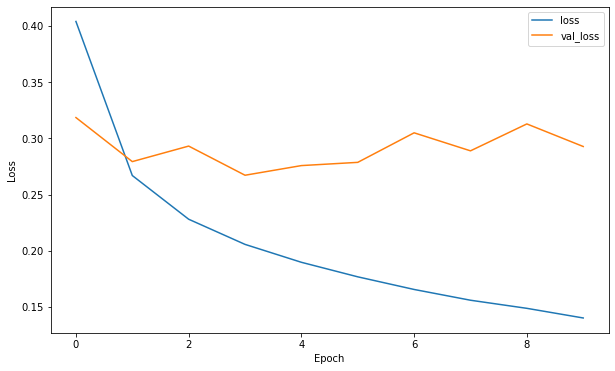

In [31]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

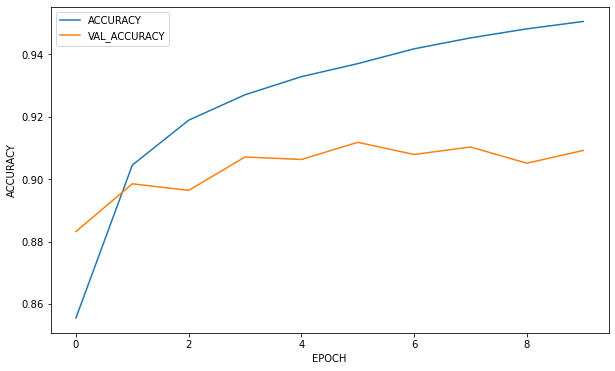

In [32]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="ACCURACY")
plt.plot(summary.val_accuracy, label="VAL_ACCURACY")
plt.legend(loc="upper left")
plt.ylabel("ACCURACY")
plt.xlabel("EPOCH")
plt.show()


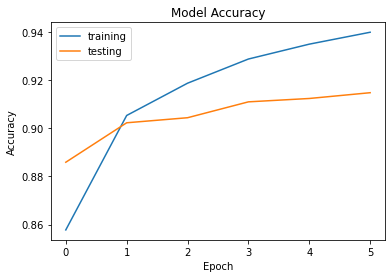

In [54]:
fig1=plt.figure(1)
plt.plot(summary['accuracy'])
plt.plot(summary['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training','testing'],loc='upper left')

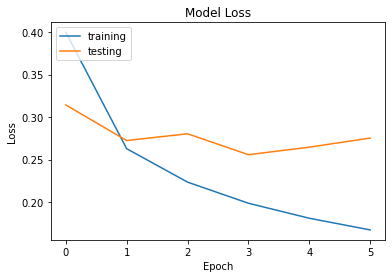

In [55]:
fig2=plt.figure(2)
plt.plot(summary['loss'])
plt.plot(summary['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training','testing'],loc='upper left')

plt.show()

In [33]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [34]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu', strides=(1,1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(metrics=['accuracy'],loss='categorical_crossentropy',optimizer='rmsprop')
#3 seçenek varsa p n nötr gibi crossentropy,2 seçenek varsa binary_crossentropy yazacaz

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4732)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               605824    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

In [36]:
model.fit(X_train, Y_train, batch_size=32, epochs=20, validation_data=(X_test,Y_test),callbacks=[early_stop])
#150 defa git gel yapmak yerine en çok tekrar eden accuracy de duruyor 79 79 79 79 diye dewam ediyorsa  orda sabitliyor bu ve al

Epoch 1/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3998 - accuracy: 0.8578 - val_loss: 0.3143 - val_accuracy: 0.8859
Epoch 2/20
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2628 - accuracy: 0.9053 - val_loss: 0.2724 - val_accuracy: 0.9023
Epoch 3/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2235 - accuracy: 0.9187 - val_loss: 0.2804 - val_accuracy: 0.9044
Epoch 4/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1987 - accuracy: 0.9288 - val_loss: 0.2558 - val_accuracy: 0.9110
Epoch 5/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1810 - accuracy: 0.9350 - val_loss: 0.2646 - val_accuracy: 0.9124
Epoch 6/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1673 - accuracy: 0.9399 - val_loss: 0.2753 - val_accuracy: 0.9148


In [37]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.399796,0.857767,0.314276,0.8859
1,0.262848,0.905333,0.272401,0.9023
2,0.223484,0.918750,0.280364,0.9044
3,0.198655,0.928800,0.255751,0.9110
4,0.180995,0.934983,0.264601,0.9124
5,0.167269,0.939933,0.275334,0.9148


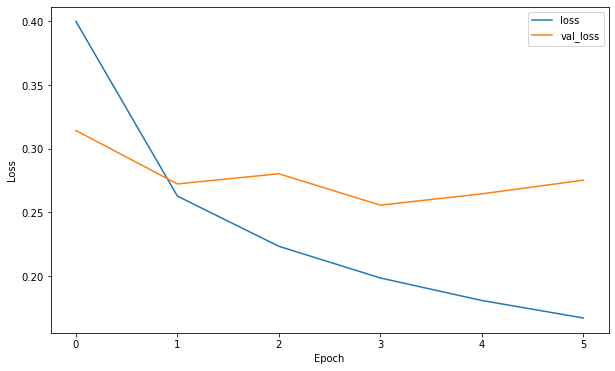

In [38]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

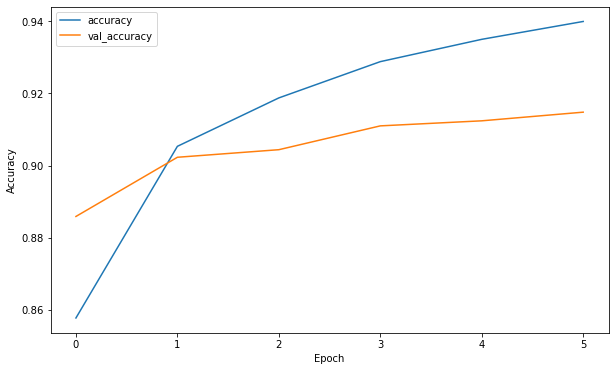

In [39]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

# Model Evaluation

In [40]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 [==============================] - 1s 4ms/step - loss: 0.2753 - accuracy: 0.9148
[0.27533435821533203, 0.9147999882698059]


In [41]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix
preds = model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [42]:
predictions= np.argmax(preds, axis=1)
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [43]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1000
           1       0.99      0.98      0.98      1000
           2       0.89      0.84      0.86      1000
           3       0.91      0.93      0.92      1000
           4       0.86      0.88      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.74      0.79      0.76      1000
           7       0.95      0.98      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.92     10000
weighted avg       0.92      0.91      0.92     10000



In [44]:
print(confusion_matrix(y_test, predictions))


[[845   0  16  16   3   2 114   0   4   0]
 [  0 977   1  13   4   0   3   0   2   0]
 [ 18   0 836  10  63   0  72   0   1   0]
 [ 10   5   7 926  23   0  28   0   1   0]
 [  1   0  35  22 882   2  57   0   1   0]
 [  0   0   0   0   0 978   0  12   0  10]
 [ 76   1  44  31  54   0 787   0   7   0]
 [  0   0   0   0   0   5   0 984   0  11]
 [  2   1   0   5   1   2   6   4 979   0]
 [  0   0   0   0   0   7   1  38   0 954]]


In [45]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.27533435821533203
Test accuracy: 0.9147999882698059


Text(0.5, 0, 'T-shirt/top')

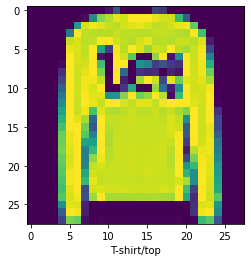

In [46]:
my_image = X_test[1]
plt.imshow(my_image.reshape(28,28))   
plt.xlabel(class_names[y_train[1]])


In [47]:
model.predict(my_image.reshape(1,28,28,1))

1/1 [==============================] - 0s 28ms/step


array([[1.0036167e-06, 1.1224614e-21, 9.9999881e-01, 1.1005251e-12,
        1.5523407e-09, 8.1534746e-16, 2.7901183e-07, 1.3994893e-16,
        6.2978560e-14, 6.1528221e-18]], dtype=float32)

In [48]:
np.argmax(model.predict(my_image.reshape(1,28,28,1)), axis=1)

1/1 [==============================] - 0s 20ms/step


array([2], dtype=int64)

# Model Saving

In [49]:
#Machine learning fotmatında save etme
#serialize model to JSON
model_json=model.to_json()
with open("model_mnist.json","w") as json_file:
    json_file.write(model_json)
    
#seriakize weights to HDF5
model.save_weights("model_mnist.h5")
print("Saved model to disk")

Saved model to disk
